Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

Importing Datasets

In [2]:
path=r'/Users/charlesrhodes/Documents'

In [3]:
df_original = pd.read_pickle(os.path.join(path,'df_original.pkl'))

In [4]:
df = pd.read_pickle(os.path.join(path,'df_62.pkl'))

In [5]:
df_2021 = df_original.drop([34, 58, 76, 86, 104, 110, 130, 137, 170, 173, 180, 182, 188, 202, 207])

In [6]:
df_2021.head()

,country_name,country_code,region,income_group,income_group_num,num_of_years,1972,1973,1974,1975,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,Aruba,ABW,Latin America & Caribbean,High income,4,35,,,,,...,-1.833977,5.635318,-0.709567,2.885166,1.515938,4.917139,4.738331,0.181216,-18.698325,17.2253
1,Afghanistan,AFG,South Asia,Low income,1,19,,,,,...,8.247144,2.002522,-0.964803,-1.666416,-0.345802,-0.253594,-1.688577,0.932833,-5.364666,-22.965296
2,Angola,AGO,Sub-Saharan Africa,Lower middle income,2,41,,,,,...,4.536024,1.101887,1.028262,-2.64642,-6.011783,-3.633446,-4.676622,-4.014917,-8.635446,-2.050717
3,Albania,ALB,Europe & Central Asia,Upper middle income,3,41,,,,,...,1.584873,1.187234,1.985388,2.516827,3.480293,3.897741,4.276326,2.523894,-2.925821,9.526027
4,Andorra,AND,Europe & Central Asia,High income,4,50,0.997233,0.890677,-0.920696,-5.412483,...,-5.571256,-4.026027,2.140939,1.257416,2.574505,-1.416579,-0.00387,0.238297,-12.735078,7.110481


In [7]:
df_2021.shape

(196, 56)

Exploring Variables via Scatterplot

/Users/charlesrhodes/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='income_group_num', ylabel='Density'>

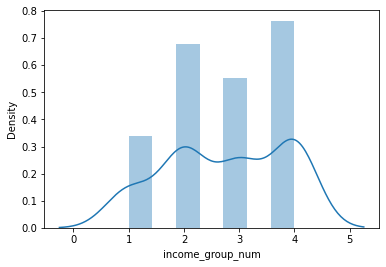

In [10]:
sns.distplot(df['income_group_num'],bins = 7, kde = True)

/Users/charlesrhodes/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='2021', ylabel='Density'>

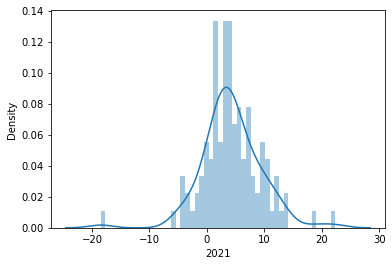

In [15]:
sns.distplot(df['2021'],bins = 50, kde = True)

In [11]:
#Checking the mean for the GDP growth rate % in 2021
df_2021['2021'].mean()

4.144236939260344

In [12]:
#Checking the median for the GDP growth rate % in 2021
df_2021['2021'].median()

3.64958485547121

In [13]:
#Checking the maximum for the GDP growth rate % in 2021
df_2021['2021'].max()

39.8371601779231

In [14]:
#Checking the miniimum for the GDP growth rate % in 2021
df_2021['2021'].min()

-22.965295860551

Hypothesis: If a country is a higher income, then it is more likely to have GDP growth.

Data Prep:

In [24]:
X = df['income_group_num'].values.reshape(-1,1)
y = df['2021'].values.reshape(-1,1)

In [27]:
X

array([[4],
       [3],
       [4],
       [4],
       [1],
       [4],
       [2],
       [1],
       [2],
       [4],
       [3],
       [4],
       [2],
       [3],
       [3],
       [1],
       [4],
       [3],
       [2],
       [2],
       [1],
       [2],
       [3],
       [3],
       [3],
       [4],
       [4],
       [3],
       [2],
       [3],
       [2],
       [4],
       [4],
       [3],
       [4],
       [3],
       [4],
       [3],
       [2],
       [1],
       [1],
       [4],
       [3],
       [3],
       [4],
       [2],
       [2],
       [2],
       [2],
       [4],
       [2],
       [3],
       [4],
       [3],
       [4],
       [2],
       [2],
       [4],
       [2],
       [2],
       [4],
       [2],
       [4],
       [1],
       [3],
       [1],
       [4],
       [2],
       [2],
       [1],
       [3],
       [1],
       [2],
       [2],
       [4],
       [4],
       [2],
       [4],
       [2],
       [4],
       [3],
       [2],
       [2],
    

In [29]:
y

array([[  7.1104813 ],
       [  9.357176  ],
       [  2.1057112 ],
       [  4.1023173 ],
       [ -0.8891273 ],
       [  5.636308  ],
       [  4.2389793 ],
       [  4.1101403 ],
       [  5.7166452 ],
       [ 13.319673  ],
       [ 13.7542305 ],
       [  5.456447  ],
       [  4.8469725 ],
       [  4.0678725 ],
       [  9.562017  ],
       [ -1.2102796 ],
       [ 10.563359  ],
       [  8.013346  ],
       [  4.4418554 ],
       [  0.9535836 ],
       [  2.8323793 ],
       [ -4.4394894 ],
       [  9.418279  ],
       [  6.9355855 ],
       [  1.6528171 ],
       [  2.5835574 ],
       [  4.402231  ],
       [ 11.078277  ],
       [  1.7984197 ],
       [  3.0103781 ],
       [  1.6273187 ],
       [  5.408113  ],
       [  2.7599986 ],
       [ -5.5414023 ],
       [  6.53512   ],
       [ -0.6442059 ],
       [  7.1327205 ],
       [ 10.885702  ],
       [  3.2622821 ],
       [  1.661892  ],
       [  1.5387096 ],
       [  9.01911   ],
       [  6.394085  ],
       [ 18

In [30]:
# Create the testing and training split to test and train the variables
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.3,random_state = 0)

Running Regressions

In [31]:
regression = LinearRegression()

In [32]:
# Train the regression
regression.fit(X_train, y_train)

LinearRegression()

In [41]:
y_predicted = regression.predict(X_test)

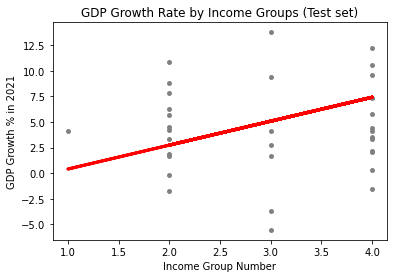

In [49]:
plot_test = plt
plot_test.scatter(X_test, y_test, color='gray', s = 15)
plot_test.plot(X_test, y_predicted, color='red', linewidth =3)
plot_test.title('GDP Growth Rate by Income Groups (Test set)')
plot_test.xlabel('Income Group Number')
plot_test.ylabel('GDP Growth % in 2021')
plot_test.show()

In [54]:
#From a glance it appears the line is a poor fit for the data.

In [55]:
# Checking the MSE and r-squared scores
mse = mean_squared_error(y_test, y_predicted)
r2 = r2_score(y_test, y_predicted)
print(mse)
print(r2)

23.59797575704124
-0.21944156118951308


In [56]:
#It it clear that this linear regression is a terrible fit for the data with a negative r-squared score.

In [57]:
# Compare the Predicted and Actual Outcomes
data = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predicted.flatten()})
data.head(30)

,Actual,Predicted
0,2.780845,5.073614
1,13.754230,5.073614
2,3.326892,7.411884
3,2.105711,7.411884
4,1.652817,5.073614
5,-1.514121,7.411884
6,6.271613,2.735344
7,4.110140,0.397074
8,10.563359,7.411884
9,12.196721,7.411884


In [58]:
# The model performed terribly on the 30-set practice, with only one of the predicted 30 values falling close, within around 0.08 and only 2 were closer than 1 point.